<a href="https://colab.research.google.com/github/Nareekan789/BSC_DPDM23/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

In [2]:
import pandas as pd
import numpy as np

## Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [4]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [5]:
credit = pd.read_csv('/content/drive/MyDrive/dsc_dpdm23_data/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [7]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [8]:
credit .head()

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,t,t,1,f,g,0,+
1,4.460,3.04,t,t,6,f,g,560,+
2,0.500,1.50,t,f,0,f,g,824,+
3,1.540,3.75,t,t,5,t,g,3,+
4,5.625,1.71,t,f,0,f,s,0,+


In [9]:
credit = credit[['a9','a10','a12','a13','a16']]

In [10]:
credit

,a9,a10,a12,a13,a16
0,t,t,f,g,+
1,t,t,f,g,+
2,t,f,f,g,+
3,t,t,t,g,+
4,t,f,f,s,+
...,...,...,...,...,...
685,f,f,f,g,-
686,f,t,t,g,-
687,f,t,t,g,-
688,f,f,f,g,-


##Devide data into train and test

In [11]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})

## Try simple ML

In [12]:
import numpy as np

In [13]:
np.random.seed(seed=1)

In [14]:
a = np.random.randint(2, size=len(credit))

In [15]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [16]:
train = credit[a == 1]
train.shape

(324, 5)

In [17]:
test = credit[a == 0]
test.shape

(366, 5)

## Start Decision Tree

### import

In [18]:
from sklearn.tree import DecisionTreeClassifier

### define

In [19]:
Dtree1 = DecisionTreeClassifier(random_state=0)

### train

In [20]:
X_train = train.iloc[:,:-1]#ทุก collumn ยกเว้นสุดท้าย

In [21]:
y_train = train.iloc[:,-1]

In [22]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
from sklearn import tree

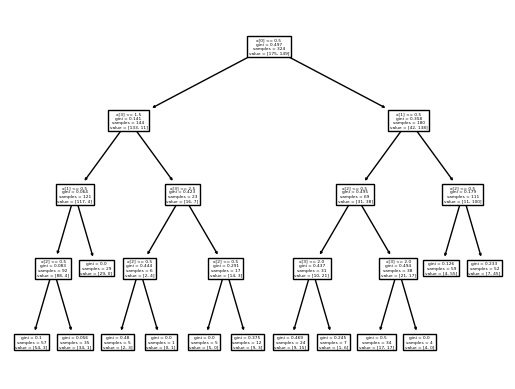

In [24]:
tree.plot_tree(Dtree1);

### test

In [25]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [26]:
y_predict = Dtree1.predict(X_test)

In [27]:
y_test

2      1
3      1
9      1
10     1
12     1
      ..
685    0
686    0
687    0
688    0
689    0
Name: a16, Length: 366, dtype: int64

In [28]:
y_predict

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
 from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, y_predict)

0.8387978142076503

## Set parameter

### Import

In [31]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [32]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=2)

### Train

In [33]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

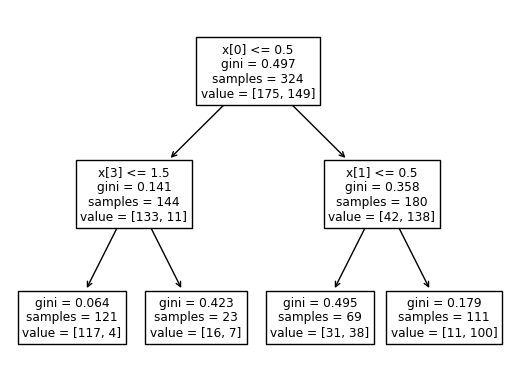

In [34]:
tree.plot_tree(Dtree2);

### Test

In [35]:
y_predict2 = Dtree2.predict(X_test)

In [36]:
accuracy_score(y_test, y_predict2)

0.8715846994535519

# ~~HW5~~

Build a decision tree model which has better accuracy than 0.86 and describe about parameters you set.

### HW3
ให้แต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน patameter ของตัวเองว่ามันคืออะไร
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
 - เเถว 1 : criterion,max_leaf_nodes
 - เเถว 2 : min_samples_split,splitter
 - เเถว 3 : min_samples_leaf,max_features
 - เเถว 4 : min_impurity_decrease
 - เเถว 5 : min_weight_fraction_leaf

#เเถว 3 : min_samples_leaf,max_features

min_samples_leaf

คือพารามิเตอร์ที่กำหนดจำนวนขั้นต่ำของตัวอย่างที่ต้องมีในใบ (leaf) ของต้นไม้ (decision tree) ที่สร้างขึ้น โดยหากจำนวนตัวอย่างในใบน้อยกว่าหรือเท่ากับ min_samples_leaf แล้วจะไม่ทำการแยกสาขาต่อไปแล้วจะเรียกใบนั้นว่า "leaf node" หรือ "ใบ".

In [111]:
Dtreemin_samples_leaf1 = DecisionTreeClassifier(random_state=0,min_samples_leaf=20) #min_samples_leaf=20

In [112]:
Dtreemin_samples_leaf1.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=0)

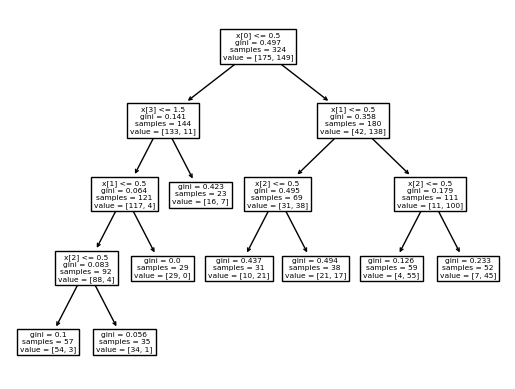

In [113]:
tree.plot_tree(Dtreemin_samples_leaf1);

In [114]:
y_predictsamples_leaf20 = Dtreemin_samples_leaf1.predict(X_test)

In [115]:
accuracy_score(y_test,y_predictsamples_leaf20)

0.8387978142076503

In [116]:
Dtreemin_samples_leaf2 = DecisionTreeClassifier(random_state=0,min_samples_leaf=150) #min_samples_leaf=150

In [117]:
Dtreemin_samples_leaf2.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=150, random_state=0)

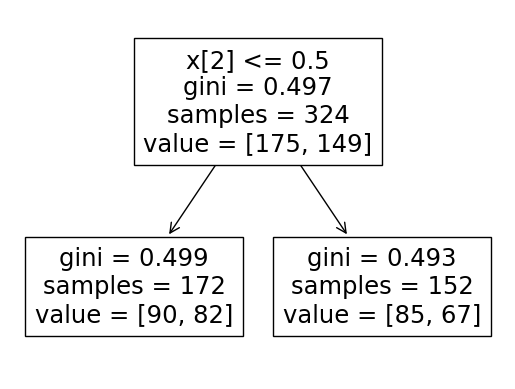

In [118]:
tree.plot_tree(Dtreemin_samples_leaf2);

In [119]:
y_predictsamples_leaf150 = Dtreemin_samples_leaf2.predict(X_test)

In [120]:
accuracy_score(y_test,y_predictsamples_leaf150)

0.5683060109289617

In [126]:
Dtreemin_samples_leaf3 = DecisionTreeClassifier(random_state=0,min_samples_leaf=50) #min_samples_leaf=50

In [127]:
Dtreemin_samples_leaf3.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=0)

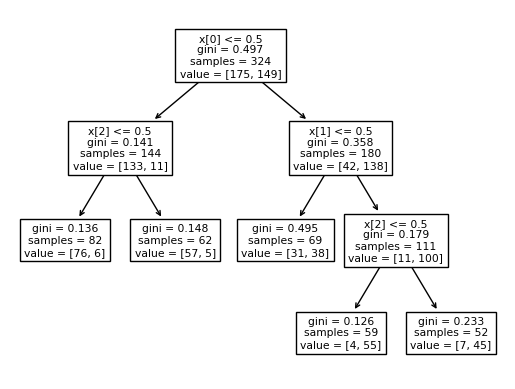

In [128]:
tree.plot_tree(Dtreemin_samples_leaf3);

In [129]:
y_predictsamples_leaf50 = Dtreemin_samples_leaf3.predict(X_test)

In [130]:
accuracy_score(y_test,y_predictsamples_leaf50)

0.8715846994535519

max_features
 - ใช้กำหนดจำนวนคุณลักษณะ (features) ที่จะถูกพิจารณาในการทำการแยก (splitting) ในแต่ละโหนด (node) ของต้นไม้ตัดสินใจ (decision tree). การกำหนด max_features ช่วยลดความซับซ้อนของต้นไม้ และมีผลในการควบคุม overfitting.

In [234]:
Dtreemax_features1 = DecisionTreeClassifier(random_state=0,max_features =3,max_depth=3)
##ถูกกำหนดเป็น 0.25 ซึ่งหมายความว่าในแต่ละโหนดของต้นไม้จะใช้คุณลักษณะเพียง 25% ของคุณลักษณะทั้งหมดที่มีในการทำการแยก.

In [235]:
Dtreemax_features1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, random_state=0)

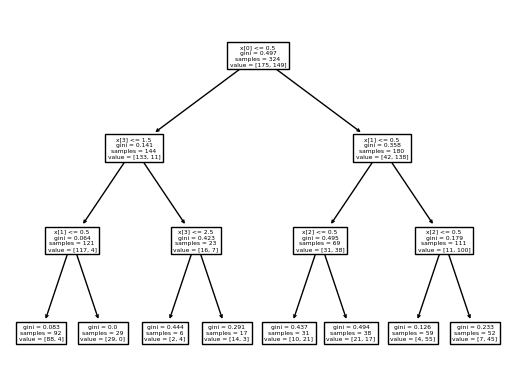

In [236]:
tree.plot_tree(Dtreemax_features1);

In [220]:
y_predictmax_features25 = Dtreemax_features1.predict(X_test)

In [221]:
accuracy_score(y_test, y_predictmax_features25)

0.8387978142076503

In [203]:
Dtreemax_features2 = DecisionTreeClassifier(random_state=0,max_features =4,max_depth=3)
##ถูกกำหนดเป็น 0.25 ซึ่งหมายความว่าในแต่ละโหนดของต้นไม้จะใช้คุณลักษณะเพียง 25% ของคุณลักษณะทั้งหมดที่มีในการทำการแยก.

In [204]:
Dtreemax_features2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=4, random_state=0)

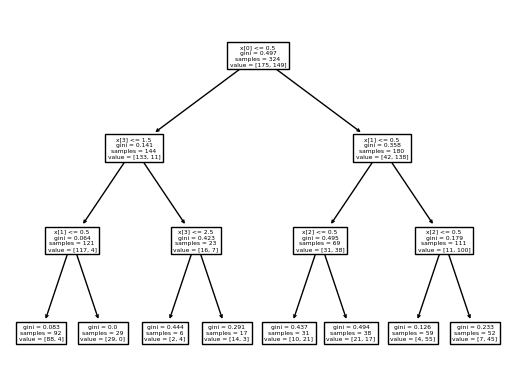

In [205]:
tree.plot_tree(Dtreemax_features2);

In [206]:
y_predictmax_features50 = Dtreemax_features1.predict(X_test)

In [207]:
accuracy_score(y_test, y_predictmax_features50)

0.8005464480874317

In [150]:
Dtreemax_features3 = DecisionTreeClassifier(random_state=0,max_features =0.10)
##ถูกกำหนดเป็น 0.25 ซึ่งหมายความว่าในแต่ละโหนดของต้นไม้จะใช้คุณลักษณะเพียง 25% ของคุณลักษณะทั้งหมดที่มีในการทำการแยก.

In [151]:
Dtreemax_features3.fit(X_train,y_train)

DecisionTreeClassifier(max_features=0.1, random_state=0)

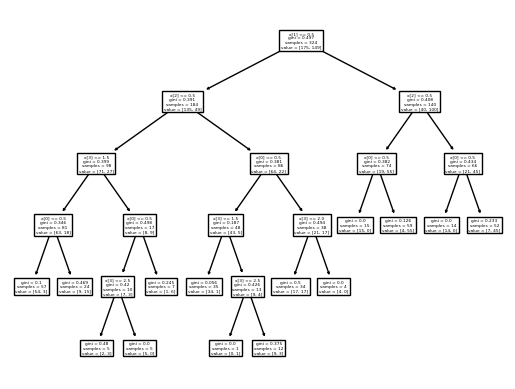

In [152]:
tree.plot_tree(Dtreemax_features3);

In [153]:
y_predictmax_features10 = Dtreemax_features1.predict(X_test)

In [154]:
accuracy_score(y_test, y_predictmax_features10)

0.8387978142076503